In [1]:
from copy import deepcopy

In [11]:
def nussinov_algor(seq, MinLoop) :
    seq_size = len(seq)
    arr = [[0 for i in range(seq_size)] for j in range(seq_size)]
    paired = [('A','U'),('U','A'),('G','C'),('C','G')]
    for j in range(1,seq_size) :
        for i in range(j-1,-1,-1) :
            max_val = 0
            if j-i >= MinLoop :
                max_val = max(max_val,arr[i+1][j]) #i unpaired
                max_val = max(max_val,arr[i][j-1]) #j unparied
                if (seq[i],seq[j]) in paired :
                    max_val = max(max_val, arr[i+1][j-1] + 1)
                for k in range(i+1,j) :
                    max_val = max(max_val,arr[i][k] + arr[k+1][j])
            arr[i][j] = max_val
    return arr

In [16]:
def traceback(arr, seq, i, j) :
    seq_size = len(seq)
    paired = [('A','U'),('U','A'),('G','C'),('C','G')]
    if  i > j :
        return ''
    if arr[i][j] == arr[i+1][j] :
        return '.' + traceback(arr, seq, i+1, j)
    if arr[i][j] == arr[i][j-1] :
        return traceback(arr, seq, i, j-1) + '.'
    if (seq[i],seq[j]) in paired and arr[i+1][j-1]+1 == arr[i][j] :
        return '('+ traceback(arr,seq,i+1,j-1) + ')'
    for k in range(i+1, j) :
        if arr[i][k] + arr[k+1][j] == arr[i][j] :
            return traceback(arr,seq,i,k) + traceback(arr,seq,k+1,j)
    
def nussinov(seq, MinLoop = 4) :
    i = 0
    j = len(seq)-1
    arr = nussinov_algor(seq,MinLoop)
    return traceback(arr,seq,i,j)

In [22]:
seq = 'GCCAGGGUGGCAGAGGGGCUUUGCGGCGGACUUCAGAUCCGCUUUACCCCGGUUCGAAUCCGGGCCCUGGC' 
nussinov(seq)

'((((.((.((((.((...))).))((((((..(...))))))....)(((((.(...).))))))))))))'

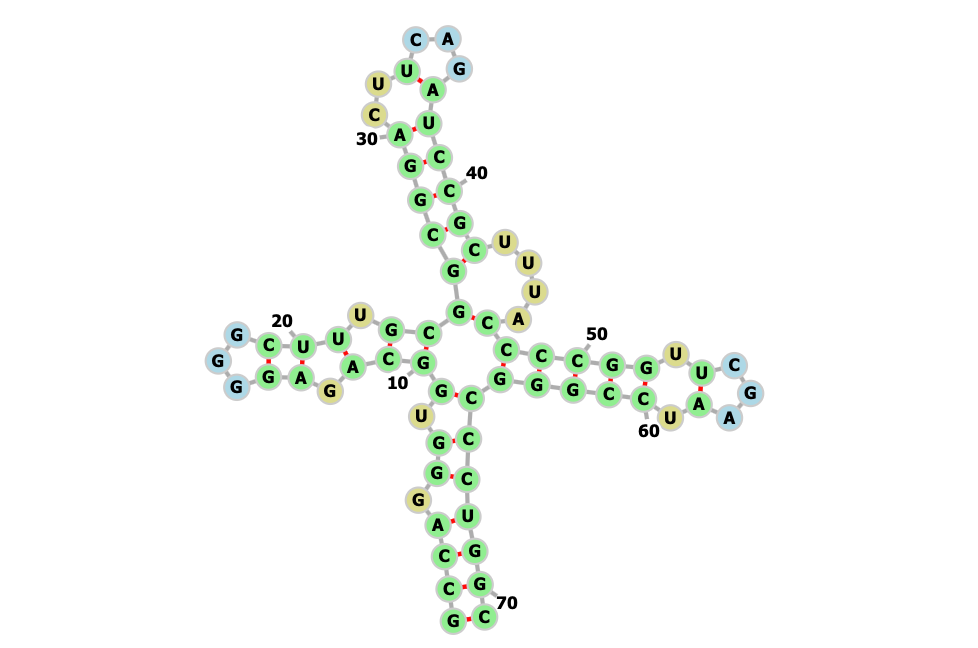

In [19]:
seq = "NNNUUGGUGGCGAUAGCGAAGAGGUCACACCCGUUCCCAUACCGAACACGGAAGUUAAGCUCUUCAGCGCCGAUGGUAGUCGGGGGUUUCCCCCUGUGAGAGUAGGACGCCGCCAAGC"
print(nussinov(seq))

...((((.((((.(((.((((.(((...)))).))))(.(.((.((((((((((..(...)))))..))((...))).))((((((...))))).))).)))))...)))).))))..
